Support vector machine is a popular classification algorithm. Here we will solve iris flower classification problem using svm and sklearn library. We also cover how to fine tune svm classifier using different parameters such as gamma and regularization. Basically the way support vector machine works is it draws a hyper plane in n dimension space such that it maximizes the margin between classification groups.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [13]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


Text(0, 0.5, 'sepal width (cm)')

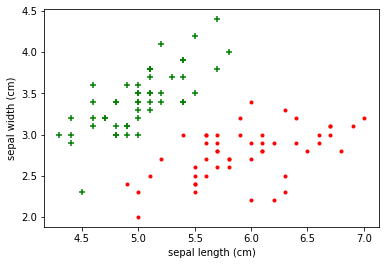

In [15]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

Text(0, 0.5, 'petal width (cm)')

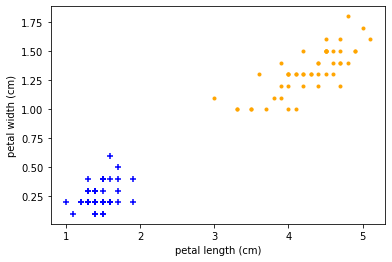

In [18]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='blue',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='orange',marker='.')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X=df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [24]:
X_train.shape

(120, 4)

In [25]:
y_test.shape

(30,)

In [26]:
from sklearn.svm import SVC
clf=SVC()   

In [27]:
clf.fit(X_train,y_train)

SVC()

In [28]:
clf.score(X_test,y_test)

0.9666666666666667

In [40]:
from sklearn.svm import SVC
clf=SVC(C=10)   #C=regularization
                # gamma

In [41]:
clf.fit(X_train,y_train)

SVC(C=10)

In [42]:
clf.score(X_test,y_test)

0.9666666666666667

In [39]:
from sklearn.svm import SVC
clf=SVC(gamma=10)   #C=regularization
                # gamma
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9333333333333333

In [38]:
from sklearn.svm import SVC
clf=SVC(gamma=5)   #C=regularization
                   # gamma, kernel=default ='rbf',change it to linear
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9333333333333333

In [37]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')   #C=regularization
                   # gamma, kernel=default ='rbf',change it to linear
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9666666666666667

### Excercise Description
Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,

- Measure accuracy of your model using different kernels such as rbf and linear.
- Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score
- Use 80% of samples as training data size

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
X=digits.data
y=digits.target

In [4]:
len(X)

1797

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [8]:
len(X_train)

1437

In [9]:
len(y_test)

360

In [10]:
from sklearn.svm import SVC

In [11]:
clf=SVC()
clf.fit(X_train,y_train)

SVC()

In [12]:
y_predicted=clf.predict(X_test)

In [13]:
clf.score(X_test,y_test)

0.9916666666666667

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 36]], dtype=int64)

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

Text(69.0, 0.5, 'Truth')

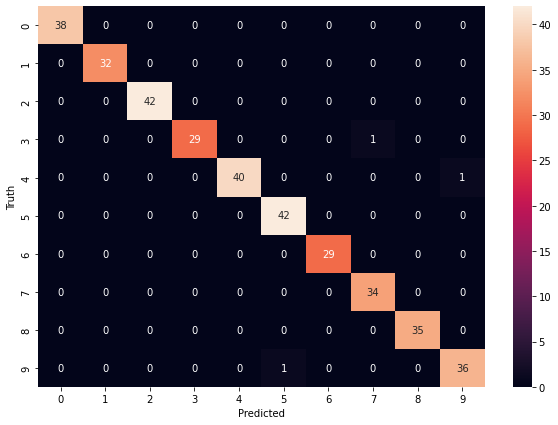

In [18]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<Figure size 432x288 with 0 Axes>

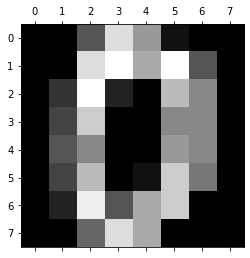

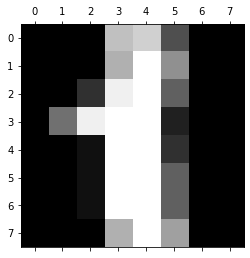

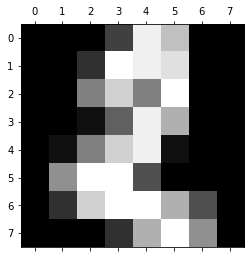

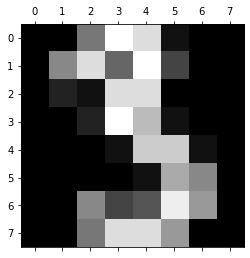

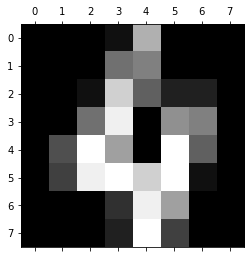

In [22]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [23]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [26]:
clf.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [27]:
clf.predict(digits.data[25:35])

array([5, 6, 7, 8, 9, 0, 9, 5, 5, 6])

In [28]:
digits.target[25:35]

array([5, 6, 7, 8, 9, 0, 9, 5, 5, 6])

### Parameter tunning

In [29]:
clf=SVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9916666666666667

In [42]:
clf=SVC(kernel='linear')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9722222222222222

In [41]:
clf=SVC(C=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9944444444444445

In [40]:
clf=SVC(C=5)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9944444444444445

In [39]:
clf=SVC(gamma=1)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.08055555555555556

In [43]:
clf=SVC(kernel='rbf')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9861111111111112